## Importing The necessary Packages

In [54]:
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.applications import MobileNetV2
from keras.layers import AveragePooling2D,Dense,Dropout,Input,Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import preprocess_input
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
datadir = r"F:\Work\AI\Mask Detection\dataset"
categories = ['With_Mask','Without_Mask']
data = []
labels = []

In [3]:
for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        try:
            img_path = os.path.join(path,img)
            image = load_img(img_path,target_size=(224,224))
            image = img_to_array(image)
            image = preprocess_input(image)
            data.append(image)
            labels.append(category)
        except:
            pass

In [4]:
data[:5]

[array([[[ 0.8509804 ,  0.92941177,  0.9372549 ],
         [ 0.81960785,  0.9137255 ,  0.9137255 ],
         [ 0.7882353 ,  0.88235295,  0.88235295],
         ...,
         [-0.19215685, -0.5058824 , -0.70980394],
         [-0.11372548, -0.40392154, -0.6313726 ],
         [-0.05882353, -0.36470586, -0.5921569 ]],
 
        [[ 0.8509804 ,  0.94509804,  0.94509804],
         [ 0.81960785,  0.9137255 ,  0.9137255 ],
         [ 0.7882353 ,  0.88235295,  0.88235295],
         ...,
         [-0.20784312, -0.52156866, -0.7254902 ],
         [-0.09803921, -0.40392154, -0.6313726 ],
         [-0.0745098 , -0.38039213, -0.60784316]],
 
        [[ 0.827451  ,  0.92156863,  0.92156863],
         [ 0.8039216 ,  0.8980392 ,  0.8980392 ],
         [ 0.77254903,  0.8666667 ,  0.8666667 ],
         ...,
         [-0.23137254, -0.54509807, -0.7411765 ],
         [-0.11372548, -0.42745095, -0.6313726 ],
         [-0.0745098 , -0.3960784 , -0.6156863 ]],
 
        ...,
 
        [[ 0.32549024,  0.3803922 

In [5]:
labels

['With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With_Mask',
 'With

In [6]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [7]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [8]:
data = np.array(data,dtype='float32')
labels = np.array(labels,dtype='float32')

In [9]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=.25,stratify=labels,
                                                 random_state=42)

In [10]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [11]:
baseModel = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))

In [66]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7,7))(headModel)
headModel = Flatten()(headModel)
headModel = Dense(64,activation='relu')(headModel)
headModel = Dropout(.5)(headModel)
headModel = Dense(32,activation='relu')(headModel)
headModel = Dense(2,activation="softmax")(headModel)

In [67]:
model = Model(inputs = baseModel.input,outputs=headModel)

In [68]:
for layer in baseModel.layers:
    layer.trainable = False

In [69]:
opt = Adam(learning_rate=1e-4,weight_decay=1e-4/20)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [70]:
History = model.fit(datagen.flow(x_train,y_train,batch_size=32),
          steps_per_epoch=len(x_train)//32,
          validation_data=(x_test,y_test),
          validation_steps=len(x_test)//32,
          epochs=20)

Epoch 1/20
7/7 [==============================] - 6s 561ms/step - loss: 0.7463 - accuracy: 0.5426 - val_loss: 0.5988 - val_accuracy: 0.6471
Epoch 2/20
7/7 [==============================] - 3s 462ms/step - loss: 0.6984 - accuracy: 0.5785 - val_loss: 0.5423 - val_accuracy: 0.6588
Epoch 3/20
7/7 [==============================] - 3s 461ms/step - loss: 0.5771 - accuracy: 0.6996 - val_loss: 0.5105 - val_accuracy: 0.6588
Epoch 4/20
7/7 [==============================] - 3s 464ms/step - loss: 0.5461 - accuracy: 0.7130 - val_loss: 0.4775 - val_accuracy: 0.6824
Epoch 5/20
7/7 [==============================] - 3s 467ms/step - loss: 0.5049 - accuracy: 0.7489 - val_loss: 0.4397 - val_accuracy: 0.7059
Epoch 6/20
7/7 [==============================] - 3s 461ms/step - loss: 0.4835 - accuracy: 0.7982 - val_loss: 0.3966 - val_accuracy: 0.8118
Epoch 7/20
7/7 [==============================] - 3s 467ms/step - loss: 0.4339 - accuracy: 0.8393 - val_loss: 0.3542 - val_accuracy: 0.8471
Epoch 8/20
7/7 [====

In [71]:
pred_result = model.predict(x_test,batch_size=20)
pred_result = np.argmax(pred_result,axis=1)
pred_result

5/5 [==============================] - 1s 164ms/step


array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [73]:
print(f"Classifiation Report:\n {classification_report(y_test.argmax(axis=1),pred_result,target_names=lb.classes_)}")


Classifiation Report:
               precision    recall  f1-score   support

   With_Mask       1.00      1.00      1.00        53
Without_Mask       1.00      1.00      1.00        32

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



In [74]:
model.save('maskdetection_model.h5')

c:\Users\mo3az\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


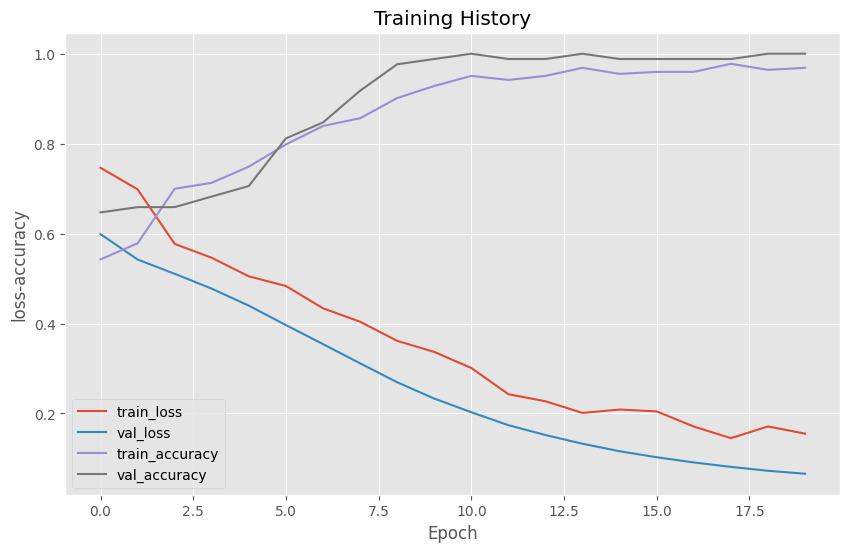

In [76]:
plt.style.use("ggplot")
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,20),History.history['loss'],label='train_loss')
plt.plot(np.arange(0,20),History.history['val_loss'],label='val_loss')
plt.plot(np.arange(0,20),History.history['accuracy'],label='train_accuracy')
plt.plot(np.arange(0,20),History.history['val_accuracy'],label='val_accuracy')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('loss-accuracy')
plt.legend(loc='lower left')
plt.savefig('training_history.png')